In [27]:
# 코랩에서 메모리 부족을 피하기 위해 부동소수점 정밀도를 낮춥니다.
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [28]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [29]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6976 - loss: 1.0380 - val_accuracy: 0.9009 - val_loss: 0.3201
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9114 - loss: 0.2914 - val_accuracy: 0.9268 - val_loss: 0.2371
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9501 - loss: 0.1865 - val_accuracy: 0.9546 - val_loss: 0.1594
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9665 - loss: 0.1289 - val_accuracy: 0.9580 - val_loss: 0.1429
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9809 - loss: 0.0944 - val_accuracy: 0.9648 - val_loss: 0.1266
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9865 - loss: 0.0680 - val_accuracy: 0.9614 - val_loss: 0.1387
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9910 - loss: 0.0481 - val_accuracy: 0.9292 - val_loss: 0.2396
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9952 - loss: 0.0358 - val_accuracy: 0.

**검증 정확도 비교 그래프 그리기**

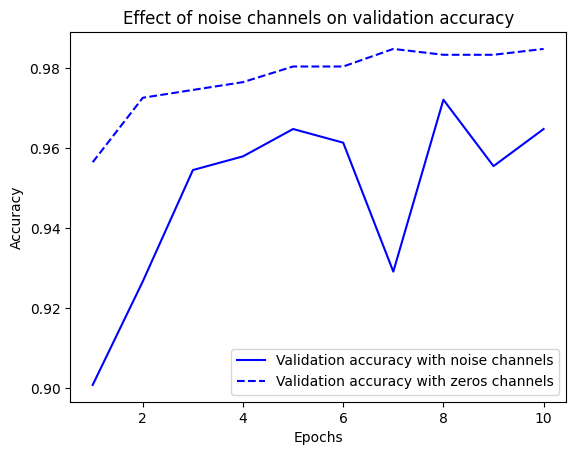

In [31]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [32]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1040 - loss: inf - val_accuracy: 0.1035 - val_loss: 2.2930
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1167 - loss: inf - val_accuracy: 0.1052 - val_loss: 2.2988
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1283 - loss: inf - val_accuracy: 0.1042 - val_loss: 2.3125
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1407 - loss: inf - val_accuracy: 0.1027 - val_loss: 2.3281
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1512 - loss: inf - val_accuracy: 0.1025 - val_loss: 2.3301
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1651 - loss: inf - val_accuracy: 0.1020 - val_loss: 2.3516
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1803 - loss: inf - val_accuracy: 0.1009 - val_loss: 2.3633
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1978 - loss: inf - val_accuracy: 0.1012 - val_loss:

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [33]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1001 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0967 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0988 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0989 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0971 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0996 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0972 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 9/10
375/375 ━━━━━

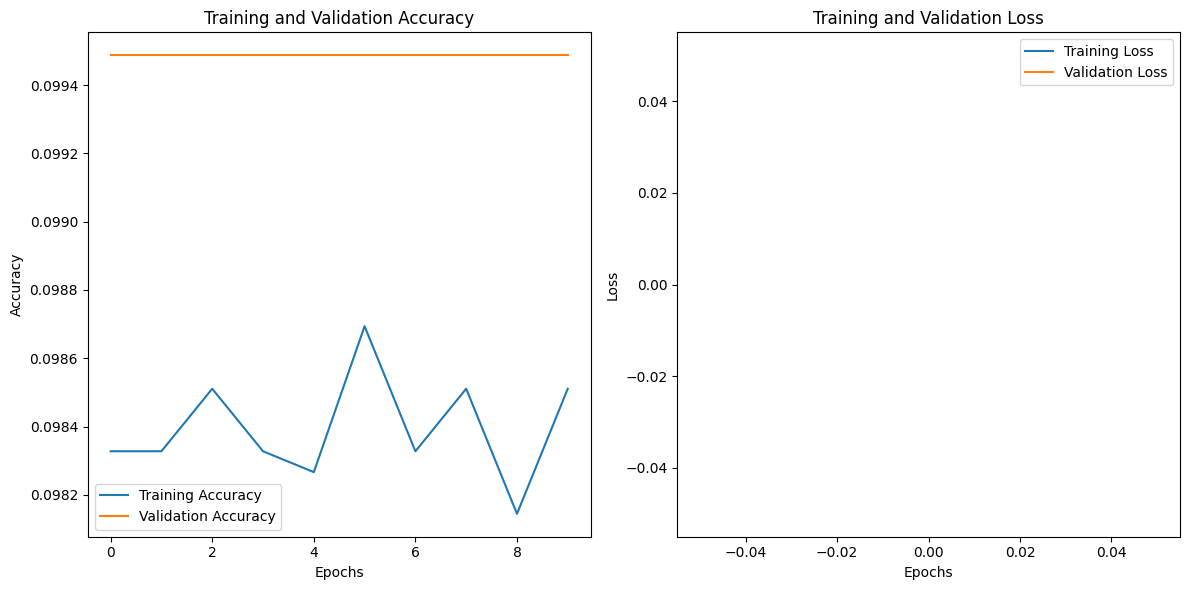

In [34]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# MNIST 데이터셋 로드 및 전처리
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# 모델 정의
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 모델 훈련 및 기록
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=0)  # 훈련 과정의 출력을 생략

# 시각화
plt.figure(figsize=(12, 6))

# 훈련 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**같은 모델을 적절한 학습률로 훈련하기**

In [35]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8375 - loss: 0.9590 - val_accuracy: 0.9585 - val_loss: 0.1421
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9737 - loss: 0.1204 - val_accuracy: 0.9634 - val_loss: 0.1490
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9808 - loss: 0.0967 - val_accuracy: 0.9614 - val_loss: 0.1632
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9901 - loss: 0.0734 - val_accuracy: 0.9731 - val_loss: 0.1378
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9922 - loss: 0.0588 - val_accuracy: 0.9702 - val_loss: 0.1666
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9927 - loss: 0.0521 - val_accuracy: 0.9727 - val_loss: 0.1720
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9958 - loss: 0.0371 - val_accuracy: 0.9712 - val_loss: 0.1842
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9960 - loss: 0.0378 - val_accuracy: 0.

In [36]:
import matplotlib.pyplot as plt

# 높은 학습률 모델 훈련 기록
high_lr_history = high_lr_model.fit(train_images, train_labels,
                                     epochs=10,
                                     batch_size=128,
                                     validation_split=0.2,
                                     verbose=0)

# 적정 학습률 모델 훈련 기록
normal_lr_history = normal_lr_model.fit(train_images, train_labels,
                                         epochs=10,
                                         batch_size=128,
                                         validation_split=0.2,
                                         verbose=0)

# 시각화
plt.figure(figsize=(12, 6))

# 훈련 정확도
plt.subplot(1, 2, 1)
plt.plot(high_lr_history.history['accuracy'], label='High Learning Rate (1.0)')
plt.plot(normal_lr_history.history['accuracy'], label='Normal Learning Rate (0.01)')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 검증 정확도
plt.subplot(1, 2, 2)
plt.plot(high_lr_history.history['val_accuracy'], label='High Learning Rate (1.0)')
plt.plot(normal_lr_history.history['val_accuracy'], label='Normal Learning Rate (0.01)')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'high_lr_model' is not defined

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6670 - accuracy: 0.8389 - val_loss: 0.3584 - val_accuracy: 0.9067
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.9136 - val_loss: 0.3086 - val_accuracy: 0.9155
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.9209 - val_loss: 0.2930 - val_accuracy: 0.9180
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.9292 - val_loss: 0.2844 - val_accuracy: 0.9219
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2937 - accuracy: 0.9292 - val_loss: 0.2793 - val_accuracy: 0.9219
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2866 - accuracy: 0.9321 - val_loss: 0.2749 - val_accuracy: 0.9238
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2822 - accuracy: 0.9331 - val_loss: 0.2722 - val_accuracy: 0.9268
Epoch 

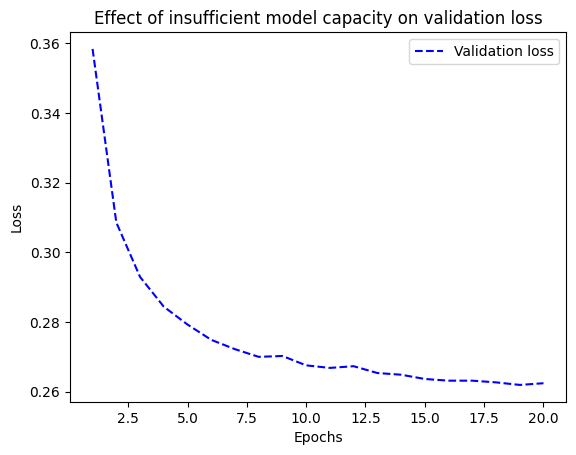

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3762 - accuracy: 0.9053 - val_loss: 0.1875 - val_accuracy: 0.9473
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1644 - accuracy: 0.9712 - val_loss: 0.1346 - val_accuracy: 0.9634
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1145 - accuracy: 0.9858 - val_loss: 0.1104 - val_accuracy: 0.9692
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9927 - val_loss: 0.0990 - val_accuracy: 0.9731
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0710 - accuracy: 0.9941 - val_loss: 0.0976 - val_accuracy: 0.9707
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0570 - accuracy: 0.9951 - val_loss: 0.1163 - val_accuracy: 0.9678
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0480 - accuracy: 0.9976 - val_loss: 0.0894 - val_accuracy: 0.9766
Epoch 

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [41]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6897 - loss: 0.6160 - val_accuracy: 0.8638 - val_loss: 0.4175
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8873 - loss: 0.3694 - val_accuracy: 0.8809 - val_loss: 0.3286
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9152 - loss: 0.2646 - val_accuracy: 0.8838 - val_loss: 0.2937
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9326 - loss: 0.2119 - val_accuracy: 0.8882 - val_loss: 0.2800
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9383 - loss: 0.1861 - val_accuracy: 0.8848 - val_loss: 0.2854
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9513 - loss: 0.1526 - val_accuracy: 0.8882 - val_loss: 0.2781
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9592 - loss: 0.1315 - val_accuracy: 0.8818 - val_loss: 0.3015
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9663 - loss: 0.1105 - val_accuracy: 0.8838 - v

**작은 용량의 모델**

In [42]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7004 - loss: 0.6229 - val_accuracy: 0.8242 - val_loss: 0.4873
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8778 - loss: 0.4368 - val_accuracy: 0.8784 - val_loss: 0.3889
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9091 - loss: 0.3400 - val_accuracy: 0.8862 - val_loss: 0.3352
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9277 - loss: 0.2736 - val_accuracy: 0.8896 - val_loss: 0.3037
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9394 - loss: 0.2268 - val_accuracy: 0.8921 - val_loss: 0.2881
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9457 - loss: 0.1976 - val_accuracy: 0.8921 - val_loss: 0.2800
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9494 - loss: 0.1766 - val_accuracy: 0.8887 - val_loss: 0.2810
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9530 - loss: 0.1601 - val_accuracy: 0.8896 - v

**큰 용량의 모델**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5781 - accuracy: 0.7070 - val_loss: 0.3630 - val_accuracy: 0.8560
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3296 - accuracy: 0.8623 - val_loss: 0.3074 - val_accuracy: 0.8687
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2310 - accuracy: 0.9097 - val_loss: 0.3416 - val_accuracy: 0.8569
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1981 - accuracy: 0.9180 - val_loss: 0.3533 - val_accuracy: 0.8462
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1459 - accuracy: 0.9448 - val_loss: 0.3137 - val_accuracy: 0.8672
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0991 - accuracy: 0.9658 - val_loss: 0.3301 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0792 - accuracy: 0.9736 - val_loss: 0.4399 - val_accuracy: 0.8687
Epoch 8/20
30

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [43]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6763 - loss: 0.7180 - val_accuracy: 0.8638 - val_loss: 0.5166
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8803 - loss: 0.4682 - val_accuracy: 0.8735 - val_loss: 0.4209
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9075 - loss: 0.3693 - val_accuracy: 0.8618 - val_loss: 0.4155
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9193 - loss: 0.3213 - val_accuracy: 0.8682 - val_loss: 0.3999
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9311 - loss: 0.2906 - val_accuracy: 0.8735 - val_loss: 0.3855
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9362 - loss: 0.2728 - val_accuracy: 0.8784 - val_loss: 0.3755
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9488 - loss: 0.2533 - val_accuracy: 0.8809 - val_loss: 0.3699
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9488 - loss: 0.2476 - val_accuracy: 0.8818 - v

**케라스에서 사용할 수 있는 가중치 규제**

In [44]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [45]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5773 - loss: 0.6675 - val_accuracy: 0.8408 - val_loss: 0.5396
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7644 - loss: 0.5444 - val_accuracy: 0.8672 - val_loss: 0.4417
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8299 - loss: 0.4596 - val_accuracy: 0.8838 - val_loss: 0.3828
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8689 - loss: 0.3971 - val_accuracy: 0.8833 - val_loss: 0.3403
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8918 - loss: 0.3425 - val_accuracy: 0.8896 - val_loss: 0.3162
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9082 - loss: 0.3063 - val_accuracy: 0.8887 - val_loss: 0.3018
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9253 - loss: 0.2656 - val_accuracy: 0.8882 - val_loss: 0.3076
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9287 - loss: 0.2456 - val_accuracy: 0.8882 - v

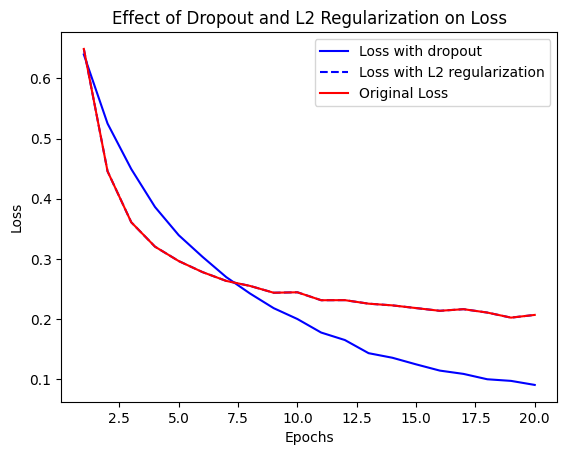

In [47]:
import matplotlib.pyplot as plt
loss_dropout = history_dropout.history["loss"]
loss_regularization = history_l2_reg.history["loss"]
loss_original = history_l2_reg.history["loss"]  # Assuming this is the original loss for comparison
epochs = range(1, 21)
plt.plot(epochs, loss_dropout, "b-", label="Loss with dropout")
plt.plot(epochs, loss_regularization, "b--", label="Loss with L2 regularization")
plt.plot(epochs, loss_original, "r-", label="Original Loss")
plt.title("Effect of Dropout and L2 Regularization on Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 요약